In [11]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import cuda
import random

tf.keras.backend.clear_session()
print(tf.__version__)

2.2.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist


In [6]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0


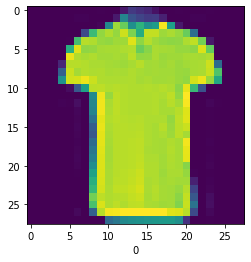

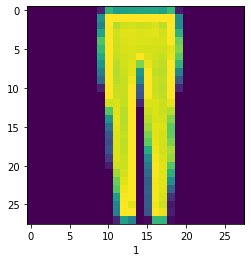

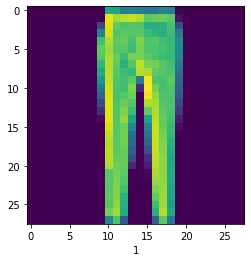

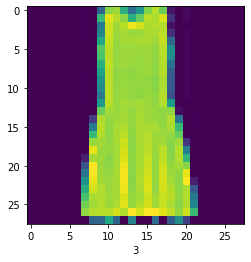

In [12]:
for grid in range(4):
    num = random.randint(0,len(X_train))
    plt.figure()
    plt.imshow(X_train[num])
    plt.xlabel(y_train[num])

In [21]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(512,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])


In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics = ['acc'])

In [24]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if logs.get('acc')>0.70:
            print("Reached 70% accuracy so cancelling training!")
            self.model.stop_training = True

In [25]:
callbacks = MyCallback()

In [ ]:
history = model.fit(X_train,y_train,epochs = 15,callbacks = [callbacks])

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - acc: 0.1016
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3003 - acc: 0.1203
Epoch 3/15
 842/1875 [============>.................] - ETA: 13s - loss: 2.2942 - acc: 0.1449